<a href="https://colab.research.google.com/github/ShireenPatel/speech-emotion-recognition/blob/master/SVM%2C%20Decision%20Tree%2C%20CNN%20on%20TORONTO%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"patelshireendharmesh","key":"a383b88dc708b648ed3d3741fbd96af0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 drive		    kaggle.json   toronto
'kaggle (1).json'   sample_data   toronto-emotional-speech-set-tess.zip


In [ ]:
!mkdir toronto
!unzip toronto-emotional-speech-set-tess.zip -d toronto

mkdir: cannot create directory ‘toronto’: File exists
Archive:  toronto-emotional-speech-set-tess.zip
replace toronto/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install librosa
import librosa
from librosa import display
import os
import pandas as pd
import glob 

In [ ]:
dir_list = os.listdir('/content/toronto/TESS Toronto emotional speech set data')
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

# New Section

In [ ]:
import time
import numpy as np

path = '/content/toronto/TESS Toronto emotional speech set data/'
lst = []

start_time = time.time()  

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=200).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #file = int(file[7:8]) 
        arr = mfccs
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 372.0375256538391 seconds ---


In [ ]:
print(lst)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Labelling the wav files and storing the numbers in list y :
0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad

In [ ]:
TESS= '/content/toronto/TESS Toronto emotional speech set data/'
path = []
emotion = []
y=[]

for i in dir_list:
    fname = os.listdir('/content/toronto/TESS Toronto emotional speech set data/' + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
            y.append(0)
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
            y.append(1)
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
            y.append(2)
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
            y.append(3)
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
            y.append(4)                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise') 
            y.append(5)              
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
            y.append(6)
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_happy       400
female_sad         400
female_neutral     400
female_surprise    400
female_angry       400
female_disgust     400
female_fear        400
Name: labels, dtype: int64

In [ ]:
print(y)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
len(y)

2800

In [ ]:
len(lst)

2800

In [ ]:
lst =np.asarray(lst)
y=np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lst, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1876, 128), (924, 128), (1876,), (924,))

In [ ]:
X_train.astype, X_test.astype, y_train.astype, y_test.astype

(<function ndarray.astype>,
 <function ndarray.astype>,
 <function ndarray.astype>,
 <function ndarray.astype>)

DESICION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       128
           1       0.94      0.91      0.93       125
           2       0.93      0.90      0.91       130
           3       0.98      0.91      0.94       137
           4       0.86      0.93      0.89       139
           5       0.83      0.84      0.84       135
           6       0.85      0.89      0.87       130

    accuracy                           0.90       924
   macro avg       0.90      0.90      0.90       924
weighted avg       0.90      0.90      0.90       924



SVM MODEL

In [ ]:
# Building the SVM model 
svmclf = SVC() 
svmclf.fit(X_train, y_train) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test, y_pred_svmclf))) 

Accuracy : 0.8614718614718615


CNN

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
x_traincnn.shape, x_testcnn.shape, y_train.shape, y_test.shape

((1876, 128, 1), (924, 128, 1), (1876,), (924,))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
#model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 16, 32)            0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 32)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 7)                 903       
Total para

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train, batch_size=128, epochs=20, validation_data=(x_testcnn, y_test))

Train on 1876 samples, validate on 924 samples
Epoch 1/20
1876/1876 [==============================] - 3s 2ms/step - loss: 11.9277 - acc: 0.1599 - val_loss: 8.0467 - val_acc: 0.2424
Epoch 2/20
1876/1876 [==============================] - 0s 125us/step - loss: 10.4389 - acc: 0.2068 - val_loss: 5.6996 - val_acc: 0.2327
Epoch 3/20
1876/1876 [==============================] - 0s 131us/step - loss: 6.9491 - acc: 0.2767 - val_loss: 1.6194 - val_acc: 0.4037
Epoch 4/20
1876/1876 [==============================] - 0s 125us/step - loss: 2.7833 - acc: 0.3412 - val_loss: 1.7265 - val_acc: 0.3907
Epoch 5/20
1876/1876 [==============================] - 0s 127us/step - loss: 1.8117 - acc: 0.3662 - val_loss: 1.5672 - val_acc: 0.5162
Epoch 6/20
1876/1876 [==============================] - 0s 120us/step - loss: 1.6563 - acc: 0.3886 - val_loss: 1.3054 - val_acc: 0.5931
Epoch 7/20
1876/1876 [==============================] - 0s 130us/step - loss: 1.5105 - acc: 0.4232 - val_loss: 1.1056 - val_acc: 0.6429
E

In [ ]:
score = model.evaluate(x_testcnn, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25205654486433254
Test accuracy: 0.9372294377454947


In [ ]:
predictions = model.predict_classes(x_testcnn)
predictions
y_test
new_Ytest = y_test.astype(int)
new_Ytest

array([3, 0, 3, 3, 2, 1, 4, 0, 4, 3, 5, 5, 3, 3, 3, 6, 0, 6, 5, 3, 4, 0,
       6, 4, 0, 6, 5, 1, 0, 4, 1, 6, 0, 0, 3, 6, 5, 1, 0, 6, 2, 0, 3, 5,
       6, 6, 0, 4, 4, 0, 1, 1, 1, 6, 3, 3, 2, 4, 2, 1, 3, 4, 6, 4, 5, 4,
       0, 1, 4, 3, 3, 6, 1, 5, 0, 6, 4, 6, 0, 2, 0, 2, 0, 4, 6, 1, 1, 5,
       6, 6, 5, 0, 3, 4, 0, 6, 1, 3, 3, 3, 3, 4, 5, 5, 4, 0, 4, 2, 0, 6,
       1, 1, 4, 2, 0, 6, 0, 2, 3, 6, 3, 6, 4, 0, 3, 4, 2, 4, 0, 5, 3, 6,
       5, 5, 5, 2, 3, 2, 3, 1, 2, 3, 4, 4, 2, 4, 4, 2, 1, 3, 6, 3, 4, 4,
       5, 5, 0, 0, 3, 1, 1, 6, 4, 5, 1, 1, 1, 0, 2, 5, 0, 1, 1, 6, 1, 3,
       4, 2, 5, 2, 1, 3, 2, 3, 4, 6, 6, 1, 4, 5, 6, 0, 5, 1, 6, 5, 4, 4,
       6, 5, 3, 3, 6, 6, 0, 6, 2, 6, 3, 4, 2, 0, 3, 4, 6, 2, 2, 0, 4, 4,
       6, 5, 2, 1, 3, 4, 0, 0, 3, 6, 4, 4, 2, 3, 2, 5, 6, 2, 3, 5, 4, 1,
       0, 2, 1, 0, 1, 1, 4, 4, 3, 3, 2, 2, 3, 5, 3, 0, 6, 1, 3, 4, 5, 0,
       0, 6, 5, 4, 3, 0, 3, 1, 4, 6, 0, 6, 2, 6, 1, 4, 4, 0, 4, 2, 2, 5,
       2, 2, 6, 4, 5, 5, 3, 4, 4, 1, 4, 4, 2, 1, 4,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      0.98      0.99       125
           2       0.88      0.97      0.92       130
           3       0.96      1.00      0.98       137
           4       1.00      0.96      0.98       139
           5       0.96      0.79      0.87       135
           6       0.78      0.87      0.82       130

    accuracy                           0.94       924
   macro avg       0.94      0.94      0.94       924
weighted avg       0.94      0.94      0.94       924



Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad

[[128   0   0   0   0   0   0]
 [  0 122   0   0   0   3   0]
 [  0   0 126   1   0   1   2]
 [  0   0   0 137   0   0   0]
 [  0   0   0   5 134   0   0]
 [  0   0   0   0   0 106  29]
 [  0   0  17   0   0   0 113]]


Save the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model_TORONTO_ORIGINAL.h5'
save_dir = '/content/drive/My Drive/TORONTO_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/TORONTO_model/Emotion_Voice_Detection_Model_TORONTO_ORIGINAL.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/My Drive/TORONTO_model/Emotion_Voice_Detection_Model_TORONTO_ORIGINAL.h5')
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 16, 32)            0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 32)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 7)                 903       
Total para

In [ ]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

924/924 [==============================] - 1s 1ms/step
Restored model, accuracy: 93.72%


APPLYING AUTOENCODER

In [ ]:
!pip install pydub
from scipy.io import wavfile
import wave
import struct
from struct import *
import matplotlib.pyplot as plt
!pip install keras==2.1.5
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
x_train= MinMaxScaler().fit_transform(lst)

In [ ]:
x_train.shape

(2800, 128)

In [ ]:
encoding_dim = 64
input_img = Input(shape=(128,))
encoded = Dense(encoding_dim, activation='relu')(input_img)


decoded = Dense(128, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


filepath="audio.compress-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=False)
autoencoder.summary()
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_train, x_train),callbacks=[checkpoint],verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               8320      
Total params: 16,576
Trainable params: 16,576
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: saving model to audio.compress-0.6981.hdf5

Epoch 00002: saving model to audio.compress-0.6894.hdf5

Epoch 00003: saving model to audio.compress-0.6851.hdf5

Epoch 00004: saving model to audio.compress-0.6813.hdf5

Epoch 00005: saving model to audio.compress-0.6777.hdf5

Epoch 00006: saving model to audio.compress-0.6747.hdf5

Epoch 00007: saving model to audio.compress-0.6724.hdf5

Ep

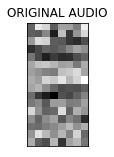

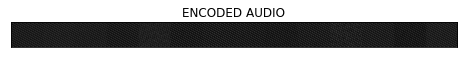

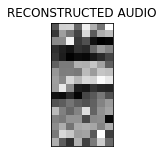

Accuracy= 0.9192111867933958 



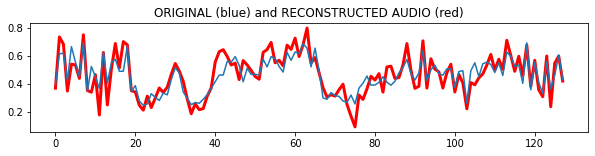

In [ ]:
filename = "audio.compress-0.6561.hdf5"
autoencoder.load_weights(filename)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

n = 1  # how many digits we will display
plt.figure(figsize=(10, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(16,8 ))
    plt.title("ORIGINAL AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(8, .5))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs.reshape(1792,100).T)
    plt.title('ENCODED AUDIO')    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(16,8 ))
    plt.title("RECONSTRUCTED AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Accuracy=",1-np.mean(abs(x_train-decoded_imgs)),'\n')

plt.figure(figsize=(10, 2))
plt.plot(x_train[0],color='r',linewidth=3)
plt.plot(decoded_imgs[0])
plt.title('ORIGINAL (blue) and RECONSTRUCTED AUDIO (red)')
plt.show()

In [ ]:
decoded_imgs.shape

(2800, 128)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(decoded_imgs, y, test_size=0.33, random_state=42)

SVM MODEL

In [ ]:
# Building the SVM model 
svmclf = SVC() 
svmclf.fit(X_train_encoded, y_train_encoded) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test_encoded) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_svmclf))) 

Accuracy : 0.9199134199134199


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_encoded, y_train_encoded)

predictions = dtree.predict(X_test_encoded)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_encoded,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.94      0.97      0.95       125
           2       0.89      0.87      0.88       130
           3       0.90      0.86      0.88       137
           4       0.86      0.90      0.88       139
           5       0.87      0.84      0.86       135
           6       0.89      0.87      0.88       130

    accuracy                           0.90       924
   macro avg       0.90      0.90      0.90       924
weighted avg       0.90      0.90      0.90       924



CNN

In [ ]:
x_traincnn_encoded = np.expand_dims(X_train_encoded, axis=2)
x_testcnn_encoded = np.expand_dims(X_test_encoded, axis=2)
x_traincnn_encoded.shape, x_testcnn_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((1876, 128, 1), (924, 128, 1), (1876,), (924,))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
#model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
#opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 16, 32)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 32)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 7)                 903       
Total para

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnnhistory_encoded=model.fit(x_traincnn_encoded, y_train_encoded, batch_size=128, epochs=70, validation_data=(x_testcnn_encoded, y_test_encoded))

Train on 1876 samples, validate on 924 samples
Epoch 1/70
1876/1876 [==============================] - 3s 2ms/step - loss: 0.2103 - acc: 0.9216 - val_loss: 0.1479 - val_acc: 0.9513
Epoch 2/70
1876/1876 [==============================] - 0s 122us/step - loss: 0.2106 - acc: 0.9254 - val_loss: 0.1466 - val_acc: 0.9535
Epoch 3/70
1876/1876 [==============================] - 0s 127us/step - loss: 0.1842 - acc: 0.9350 - val_loss: 0.1518 - val_acc: 0.9459
Epoch 4/70
1876/1876 [==============================] - 0s 128us/step - loss: 0.1995 - acc: 0.9216 - val_loss: 0.1433 - val_acc: 0.9524
Epoch 5/70
1876/1876 [==============================] - 0s 124us/step - loss: 0.2029 - acc: 0.9286 - val_loss: 0.1519 - val_acc: 0.9459
Epoch 6/70
1876/1876 [==============================] - 0s 124us/step - loss: 0.1994 - acc: 0.9296 - val_loss: 0.1480 - val_acc: 0.9491
Epoch 7/70
1876/1876 [==============================] - 0s 122us/step - loss: 0.2023 - acc: 0.9323 - val_loss: 0.1457 - val_acc: 0.9524
Epo

In [ ]:
score = model.evaluate(x_testcnn_encoded, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11189327717988522
Test accuracy: 0.9610389602648748


In [ ]:
predictions = model.predict_classes(x_testcnn_encoded)
predictions
y_test_encoded
new_Ytest_encoded = y_test_encoded.astype(int)
new_Ytest_encoded

array([3, 0, 3, 3, 2, 1, 4, 0, 4, 3, 5, 5, 3, 3, 3, 6, 0, 6, 5, 3, 4, 0,
       6, 4, 0, 6, 5, 1, 0, 4, 1, 6, 0, 0, 3, 6, 5, 1, 0, 6, 2, 0, 3, 5,
       6, 6, 0, 4, 4, 0, 1, 1, 1, 6, 3, 3, 2, 4, 2, 1, 3, 4, 6, 4, 5, 4,
       0, 1, 4, 3, 3, 6, 1, 5, 0, 6, 4, 6, 0, 2, 0, 2, 0, 4, 6, 1, 1, 5,
       6, 6, 5, 0, 3, 4, 0, 6, 1, 3, 3, 3, 3, 4, 5, 5, 4, 0, 4, 2, 0, 6,
       1, 1, 4, 2, 0, 6, 0, 2, 3, 6, 3, 6, 4, 0, 3, 4, 2, 4, 0, 5, 3, 6,
       5, 5, 5, 2, 3, 2, 3, 1, 2, 3, 4, 4, 2, 4, 4, 2, 1, 3, 6, 3, 4, 4,
       5, 5, 0, 0, 3, 1, 1, 6, 4, 5, 1, 1, 1, 0, 2, 5, 0, 1, 1, 6, 1, 3,
       4, 2, 5, 2, 1, 3, 2, 3, 4, 6, 6, 1, 4, 5, 6, 0, 5, 1, 6, 5, 4, 4,
       6, 5, 3, 3, 6, 6, 0, 6, 2, 6, 3, 4, 2, 0, 3, 4, 6, 2, 2, 0, 4, 4,
       6, 5, 2, 1, 3, 4, 0, 0, 3, 6, 4, 4, 2, 3, 2, 5, 6, 2, 3, 5, 4, 1,
       0, 2, 1, 0, 1, 1, 4, 4, 3, 3, 2, 2, 3, 5, 3, 0, 6, 1, 3, 4, 5, 0,
       0, 6, 5, 4, 3, 0, 3, 1, 4, 6, 0, 6, 2, 6, 1, 4, 4, 0, 4, 2, 2, 5,
       2, 2, 6, 4, 5, 5, 3, 4, 4, 1, 4, 4, 2, 1, 4,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest_encoded, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       128
           1       0.98      0.98      0.98       125
           2       0.95      0.96      0.96       130
           3       0.99      0.96      0.97       137
           4       0.95      0.97      0.96       139
           5       0.97      0.91      0.94       135
           6       0.91      0.95      0.93       130

    accuracy                           0.96       924
   macro avg       0.96      0.96      0.96       924
weighted avg       0.96      0.96      0.96       924



PLOTTING THE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest_encoded, predictions)
print (matrix)

# 0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad

[[127   0   0   0   1   0   0]
 [  0 123   0   0   0   2   0]
 [  0   0 125   0   1   0   4]
 [  0   0   0 132   5   0   0]
 [  2   0   0   2 135   0   0]
 [  0   3   1   0   0 123   8]
 [  0   0   5   0   0   2 123]]


SAVE THE MODEL

In [ ]:
model_name = 'Emotion_Voice_Detection_Model_TORONTO.h5'
save_dir = '/content/drive/My Drive/Toronto_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Toronto_model/Emotion_Voice_Detection_Model_TORONTO.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Toronto_model/Emotion_Voice_Detection_Model_TORONTO.h5')
loaded_model.summary()
loss, acc = loaded_model.evaluate(x_testcnn_encoded, y_test_encoded)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 16, 32)            0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 32)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 7)                 903       
Total para